In [2]:
experiment_names = [
    're-reentrant_3_ppg/ppg',
    
]

legend_names = [
    'DirectBackprop',
]

baseline_names = [
    're-reentrant_3_cmuq/ppg',
]

baseline_legend_names = [
    'MaxWeight'
]

import json
from matplotlib import pyplot as plt

epochs = []
costs = []
stds = []

baseline_costs = []
baseline_stds = []

for experiment_name in experiment_names:
    with open(f'../logs/loss/{experiment_name}/loss.json', 'r') as f:
        losses = json.load(f)

        experiment_costs = []
        experiment_stds = []
        experiment_epochs = []

        for loss in losses:
            experiment_costs.append(loss['test_loss'])
            experiment_stds.append(loss['test_loss_std'])
            experiment_epochs.append(loss['epoch'])
        
        costs.append(experiment_costs)
        stds.append(experiment_stds)
        epochs.append(experiment_epochs)

for baseline_name in baseline_names:
    with open(f'../logs/loss/{baseline_name}/loss.json', 'r') as f:
        losses = json.load(f)

        baseline_costs.append(losses[0]['test_loss'])
        baseline_stds.append(losses[0]['test_loss_std'])


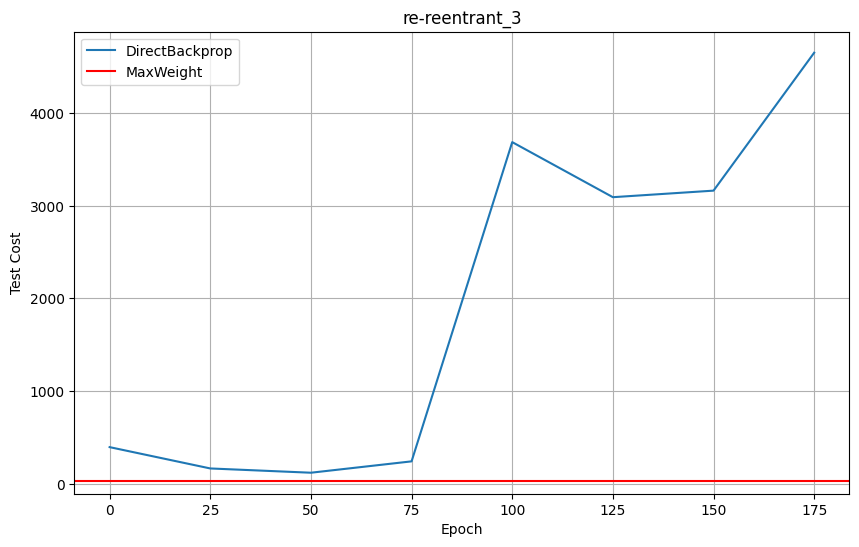

In [3]:
plt.figure(figsize=(10, 6))
for i, experiment_name in enumerate(experiment_names):
    plt.plot(epochs[i], costs[i], label=legend_names[i])
for i, baseline_name in enumerate(baseline_names):
    plt.axhline(y=baseline_costs[i], color='r', label=baseline_legend_names[i])
plt.xlabel('Epoch')
plt.ylabel('Test Cost')
plt.title('re-reentrant_3')
plt.legend()
plt.grid(True)
plt.show()
